In [3]:
import re
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
def read_file_ribo(file_name, one_type_reads, all_reada, one_type_modifs, all_modifs):
    f = open(file_name, 'r', encoding='utf8')
    line = f.readline().strip()
    while line != '':
        parts = re.split('\s+', line)
        one_type_reads.append(parts[0])
        all_reads.append(parts[0])
        modif = parts[1:]
        one_type_modifs.append(list(int(i) for i in modif))
        all_modifs.append(list(int(i) for i in modif))
        line = f.readline().strip()
    f.close()

In [5]:
def get_regions(all_regions, all_modifs, step):
    for i, read in enumerate(all_modifs):
        temp_region = 0
        read_regions = []
        over = False
        while not over:
            region_len = temp_region + step
            if region_len > len(read) - 1:
                region = read[temp_region:]             
                over = True
            else:
                region = read[temp_region:region_len]
            if 1 in region:
                read_regions.append(1)
            else:
                read_regions.append(0)
            
            temp_region = region_len
                         
        all_regions[i] = read_regions
    
    
    

In [6]:
def get_inputs(inputs, all_regions, step):
    over = False
    temp_position = 0
    while not over:
        input_len = temp_position + step
        if input_len > len(all_regions) - 1:
            temp_input = all_regions[temp_position:]
            over = True
        else:
            temp_input = all_regions[temp_position:input_len]
        
        inputs.append(temp_input)
        temp_position = input_len
    

In [7]:
def get_estimation_inputs(estimation_inputs, inputs):
    for one_input in inputs:
        est_input = []
        for read in one_input:
            est_read = random.sample(read, len(read))
            est_input.append(est_read)
        estimation_inputs.append(est_input)

In [8]:
def get_inputs_sums(inputs_sums, inputs_avgs, inputs):
    for one_input in inputs:
        one_input_sum = [0] * len(one_input[0])
        for read in one_input:
            for i, v in enumerate(read):
                one_input_sum[i] += v
        inputs_sums.append(one_input_sum)
        inputs_avgs.append(float(sum(one_input_sum)) / len(one_input_sum))
    

In [9]:
def get_estimation_inputs_sums_and_avgs(estimation_inputs_sums, estimation_inputs_avgs, estimation_inputs):
    for one_input in estimation_inputs:
        one_input_sum = [0] * len(one_input[0])
        for read in one_input:
            for i, v in enumerate(read):
                one_input_sum[i] += v
        estimation_inputs_sums.append(one_input_sum)
        estimation_inputs_avgs.append(float(sum(one_input_sum)) / len(one_input_sum))

In [24]:
def kalman_filter(inputs_sums, estimation_inputs_sums, estimation_inputs_avgs, to_print):
    Emea = max(estimation_inputs_avgs) - min(estimation_inputs_avgs)
    EST = estimation_inputs_sums[0]
    Eest = random.randint(10, 20)
    
    for i, MEA in enumerate(inputs_sums):
        KG = Eest / (Eest + Emea)
        EST_t = np.array(EST) + KG * (np.array(MEA) - np.array(EST))
    
        Eest_t = (1 - KG) * (Eest)
    
        EST = EST_t
        Eest = Eest_t
        
    
    if to_print:
        print("EST_START & EST_END")
        for i in range(len(EST)):
            print(str(estimation_inputs_sums[0][i]) + " & " + str(round(EST[i],4)) + " \\\ ")

            
    return EST

In [34]:
def plot_before_after(input_sums, EST=None, EST_ligand=None, EST_noligand=None):
    plt.figure(figsize=(20, 10))
    plt.plot(inputs_sums[0], label="BEFORE KALMAN")
    
    if EST is not None:
        plt.plot(EST, label="AFTER KALMAN ALL")
    
    if EST_ligand is not None:
         plt.plot(EST_ligand, label="AFTER KALMANA LIGAND")
            
    if EST_noligand is not None:
        plt.plot(EST_noligand, label="AFTER KALMANA NONLIGAND")
    
    plt.legend(prop={'size': 16})
    

# FILE READING

In [35]:
ligand_reads = []
noligand_reads = []
all_reads = []
ligand_modifs = []
noligand_modifs = []
all_modifs = []

read_file_ribo('TPP_TenA_ligand.tsv', ligand_reads, all_reads, ligand_modifs, all_modifs)
read_file_ribo('TPP_TenA_noligand.tsv', noligand_reads, all_reads, noligand_modifs, all_modifs)


# ALL DATA

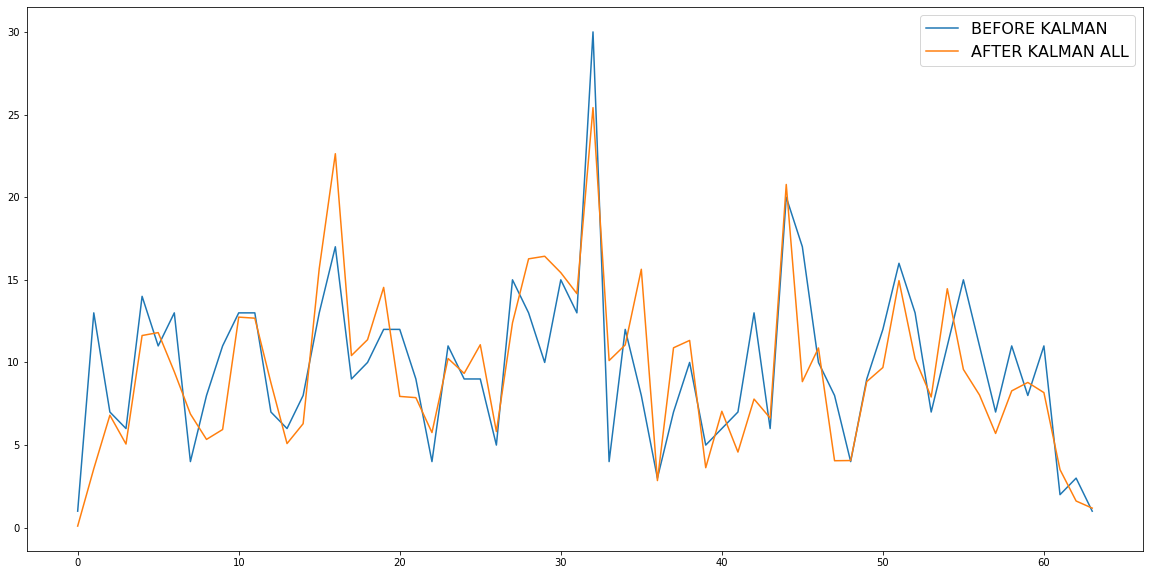

In [36]:
all_regions = [[]] * len(all_modifs)
get_regions(all_regions, all_modifs, 10)

inputs = []
get_inputs(inputs, all_regions, 100)

inputs_sums = []
inputs_avgs = []
get_inputs_sums(inputs_sums, inputs_avgs, inputs)

estimation_inputs = []
get_estimation_inputs(estimation_inputs, inputs)

estimation_inputs_sums = []
estimation_inputs_avgs = []
get_estimation_inputs_sums_and_avgs(estimation_inputs_sums, estimation_inputs_avgs, estimation_inputs)

EST = kalman_filter(inputs_sums, estimation_inputs_sums, estimation_inputs_avgs, False)

plot_before_after(inputs_sums, EST=EST)

# LIGAND DATA

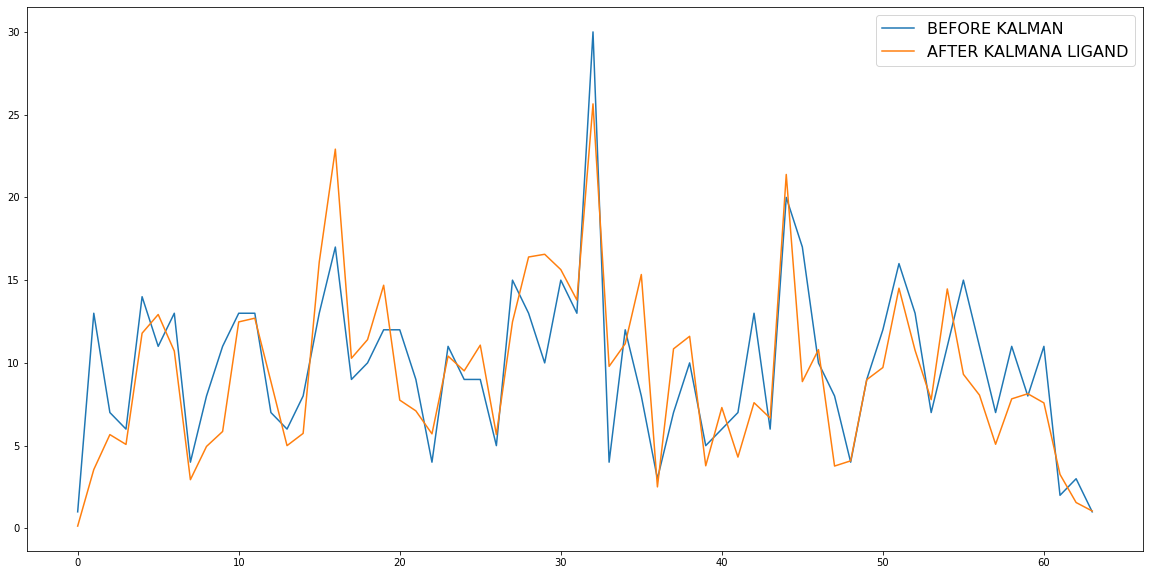

In [37]:
ligand_regions = [[]] * len(ligand_modifs)
get_regions(ligand_regions, ligand_modifs, 10)

inputs = []
get_inputs(inputs, ligand_regions, 100)

inputs_sums = []
inputs_avgs = []
get_inputs_sums(inputs_sums, inputs_avgs, inputs)

estimation_inputs = []
get_estimation_inputs(estimation_inputs, inputs)

estimation_inputs_sums = []
estimation_inputs_avgs = []
get_estimation_inputs_sums_and_avgs(estimation_inputs_sums, estimation_inputs_avgs, estimation_inputs)

EST_ligand = kalman_filter(inputs_sums, estimation_inputs_sums, estimation_inputs_avgs, False)

plot_before_after(inputs_sums, EST_ligand=EST_ligand)

# NON LIGAND DATA

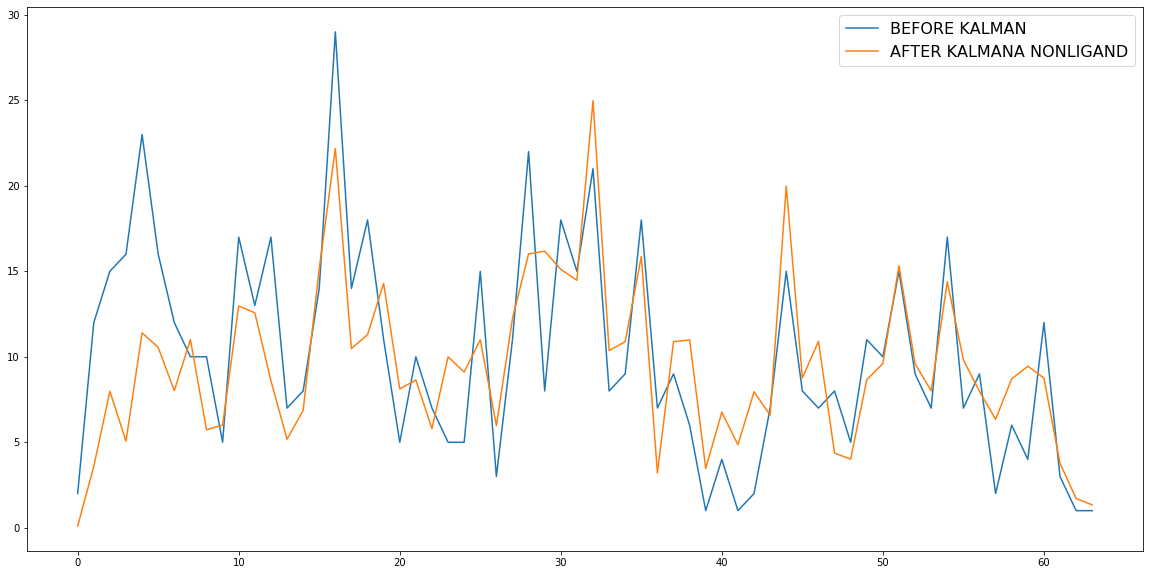

In [38]:
noligand_regions = [[]] * len(noligand_modifs)
get_regions(noligand_regions, noligand_modifs, 10)

inputs = []
get_inputs(inputs, noligand_regions, 100)

inputs_sums = []
inputs_avgs = []
get_inputs_sums(inputs_sums, inputs_avgs, inputs)

estimation_inputs = []
get_estimation_inputs(estimation_inputs, inputs)

estimation_inputs_sums = []
estimation_inputs_avgs = []
get_estimation_inputs_sums_and_avgs(estimation_inputs_sums, estimation_inputs_avgs, estimation_inputs)

EST_noligand = kalman_filter(inputs_sums, estimation_inputs_sums, estimation_inputs_avgs, False)

plot_before_after(inputs_sums, EST_noligand=EST_noligand)


# ALL TOGETHER

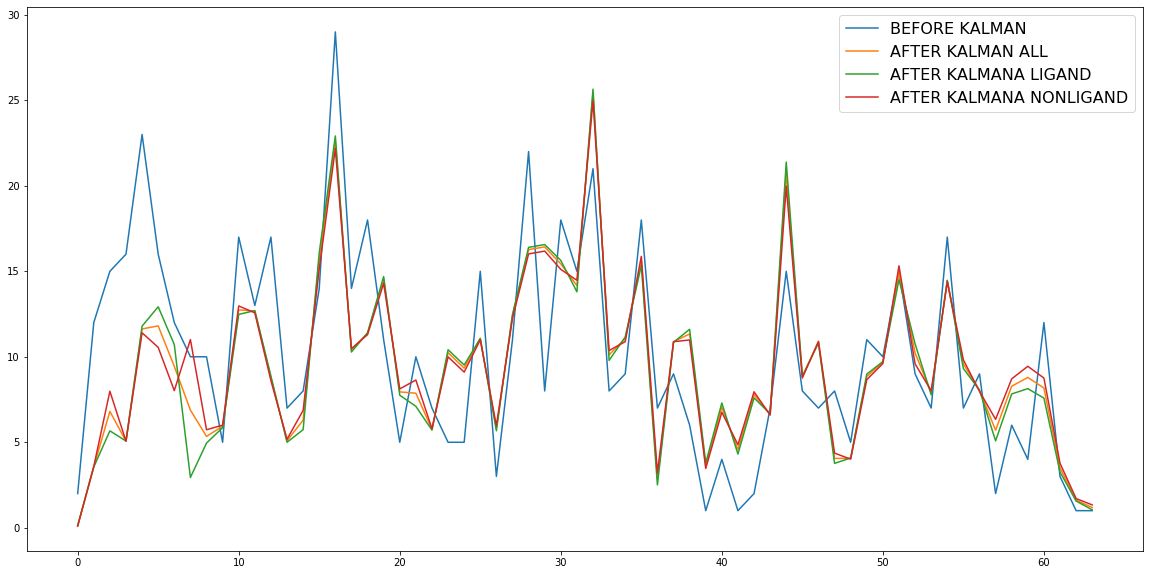

In [39]:
plot_before_after(inputs_sums, EST=EST, EST_ligand=EST_ligand, EST_noligand=EST_noligand)